In [1]:
#! /usr/bin/python3.8
#
# L'addresse ou l'on recupere les infos
# https://check.torproject.org/torbulkexitlist?ip=1.1.1.1
#
# lancement du projet 
#

In [2]:
# Intsaller des librairies nécessaires
import sys
!{sys.executable} -m pip install matplotlib seaborn sklearn
!{sys.executable} -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
# Import des bibliothéques
import json
import numpy as np
import networkx as nx
import collections
import matplotlib
import matplotlib.pyplot as plt
from selenium import webdriver
from selenium.webdriver.common import keys, action_chains
import pandas as pd
import seaborn as sns
from datetime import datetime
from dateutil import parser
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
import requests
import time
import tqdm
import sys
import re

%matplotlib inline

In [4]:
# Déclarer la variable Url
url = 'https://check.torproject.org/torbulkexitlist?ip=1.1.1.1'

In [5]:
# Ouverture de l'url avec Firefox
browser = webdriver.Firefox()
browser.get(url)

In [6]:
# Récupérer les IPs avec le Xpath de la page web
elements_IP = browser.find_elements_by_xpath('/html/body/pre')

for i in elements_IP:
    print(i.text)

176.10.99.200
54.37.16.241
109.70.100.40
51.75.64.23
82.221.128.191
109.70.100.43
185.220.100.254
97.74.237.196
185.220.103.9
172.105.35.249
144.217.60.239
195.176.3.23
185.220.100.243
185.220.100.245
198.58.107.53
104.196.43.128
199.249.230.83
185.129.62.62
199.249.230.75
185.220.101.11
104.244.76.13
185.220.101.13
66.70.228.168
185.220.101.130
23.129.64.231
23.129.64.207
71.19.144.106
95.143.193.125
51.38.64.136
185.220.100.241
124.109.1.207
109.70.100.34
185.220.101.199
178.20.55.18
178.17.170.112
130.204.161.3
45.125.65.45
142.44.246.156
185.220.101.205
195.176.3.20
49.50.107.221
199.249.230.121
109.70.100.35
91.250.242.12
185.82.219.109
46.182.21.248
185.220.103.4
51.79.86.181
205.185.117.149
192.160.102.164
199.249.230.89
45.15.16.68
45.15.16.98
51.79.86.177
80.79.23.7
149.56.44.47
212.21.66.6
207.244.70.35
217.79.178.53
51.79.53.146
185.220.100.242
185.220.101.9
109.201.133.100
217.170.204.126
204.11.50.131
171.25.193.77
185.220.102.8
91.92.109.43
199.249.230.84
109.70.100.33
18

In [7]:
# Mettre les Urls dans le tableau res
res=[]

for i in range(0, len(elements_IP)):
    IP = elements_IP[i].text
    res.append((IP.split()))
    
len(IP.split())

1481

In [8]:
# Créer une dataframe pour les IPs
df = pd.DataFrame(IP.split(),columns=['IP'])
df

IP
0       176.10.99.200
1        54.37.16.241
2       109.70.100.40
3         51.75.64.23
4      82.221.128.191
...               ...
1476  199.249.230.105
1477  199.249.230.120
1478    176.123.3.222
1479  167.172.248.216
1480    45.154.255.75

[1481 rows x 1 columns]

In [13]:
# Fermer Firefox de l'url ou nous avons récupéré les IPs
browser.close()

In [14]:
# SHODAN

In [15]:
# Déclaration des variables avec l'API shodan
api_key = ''
data = '164.128.164.28'
url_shodan = 'https://api.shodan.io/shodan/host/'

In [16]:
# Requête vers l'API shodan
r_SHODAN = requests.get(url_shodan+data, params={'key': api_key})
r_SHODAN

<Response [200]>

In [17]:
# Afficher le contenu de la variable r_SHODAN au format json
res = r_SHODAN.json()
res

{'region_code': 'SO',
 'tags': ['honeypot'],
 'ip': 2759894044,
 'area_code': None,
 'domains': ['swisscom.ch'],
 'hostnames': ['28.164.128.164.static.wline.lns.ent.cust.swisscom.ch'],
 'postal_code': None,
 'dma_code': None,
 'country_code': 'CH',
 'org': 'Swisscom',
 'data': [{'hash': -564293934,
   'tags': ['honeypot'],
   'vulns': {'CVE-2019-1552': {'verified': False,
     'references': ['https://git.openssl.org/gitweb/?p=openssl.git;a=commitdiff;h=54aa9d51b09d67e90db443f682cface795f5af9e',
      'https://git.openssl.org/gitweb/?p=openssl.git;a=commitdiff;h=b15a19c148384e73338aa7c5b12652138e35ed28',
      'https://git.openssl.org/gitweb/?p=openssl.git;a=commitdiff;h=d333ebaf9c77332754a9d5e111e2f53e1de54fdd',
      'https://git.openssl.org/gitweb/?p=openssl.git;a=commitdiff;h=e32bc855a81a2d48d215c506bdeb4f598045f7e9',
      'https://www.openssl.org/news/secadv/20190730.txt'],
     'cvss': 1.9,
     'summary': "OpenSSL has internal defaults for a directory tree where it can find a co

In [18]:
# Afficher la data qu'on souhaite utiliser via l'API shodan

print(" longitude : ", res['longitude'], "\n", 
      "latitude : ", res['latitude'], "\n", 
      "domains : ", res['domains'], "\n", 
      "vulns : ", res['vulns'], "\n", 
      "asn : ", res['asn'], "\n", 
      "ports : ", res['ports'], "\n", 
      "country_code : ", res['country_code'], "\n", 
      "country_name : ", res['country_name'], "\n", 
      "hostnames : ", res['hostnames'], "\n", 
      "isp : ", res['isp'], "\n", 
      "city : ", res['city'], "\n", 
      "os : ",res['os'])

 longitude :  7.8868 
 latitude :  47.3656 
 domains :  ['swisscom.ch'] 
 vulns :  ['CVE-2019-1552', 'CVE-2018-0737', 'CVE-2018-0734', 'CVE-2017-3736', 'CVE-2017-3737', 'CVE-2017-3735', 'CVE-2017-3738', 'CVE-2019-1559', 'CVE-2018-0739', 'CVE-2018-0732', 'CVE-2018-5407'] 
 asn :  AS3303 
 ports :  [8081, 50000, 8443, 52869, 60001, 9000, 80, 8080, 81, 22, 23, 8888, 7001, 443, 10000, 37215] 
 country_code :  CH 
 country_name :  Switzerland 
 hostnames :  ['28.164.128.164.static.wline.lns.ent.cust.swisscom.ch'] 
 isp :  Swisscom 
 city :  Trimbach 
 os :  None


In [19]:
# Afficher l'url 
r_SHODAN.url

'https://api.shodan.io/shodan/host/164.128.164.28?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj'

In [20]:
# Création des tableaux avec les données souhaitées des Noeuds exit TOR

longitude = []
latitude = []
domains = []
vulns = []
asn = []
ports = []
country_code = []
country_name = []
hostnames = []
isp = []
city = []
os = []

for ip in df['IP']:
    r = requests.get(url_shodan+ip, params={'key': api_key})
    print(r.url)
    if r.status_code == 200:
        res = r.json()
        if 'longitude' in res:
            longitude.append(res['longitude'])
        else:
            longitude.append('')
        if 'latitude' in res:
            latitude.append(res['latitude'])
        else:
            latitude.append('')
        if 'domains' in res:
            domains.append(res['domains'])
        else:
            domains.append('')
        if 'vulns' in res:
            vulns.append(res['vulns'])
        else:
            vulns.append('')
        if 'asn' in res:
            asn.append(res['asn'])
        else:
            asn.append('')
        if 'ports' in res:
            ports.append(res['ports'])
        else:
            ports.append('')
        if 'country_code' in res:
            country_code.append(res['country_code'])
        else:
            country_code.append('')
        if 'country_name' in res:
            country_name.append(res['country_name'])
        else:
            country_name.append('')
        if 'hostnames' in res:
            hostnames.append(res['hostnames'])
        else:
            hostnames.append('')
        if 'isp' in res:
            isp.append(res['isp'])
        else:
            isp.append('')
        if 'city' in res:
            city.append(res['city'])
        else:
            city.append('')
        if 'os' in res:
            os.append(res['os'])
        else:
            os.append('')
    else:
        longitude.append('')
        latitude.append('')
        domains.append('')
        vulns.append('')
        asn.append('')
        ports.append('')
        country_code.append('')
        country_name.append('')
        hostnames.append('')
        isp.append('')
        city.append('')
        os.append('')
    time.sleep(1)


https://api.shodan.io/shodan/host/176.10.99.200?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/54.37.16.241?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/109.70.100.40?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.75.64.23?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/82.221.128.191?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/109.70.100.43?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.100.254?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/97.74.237.196?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.103.9?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/172.105.35.249?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/144.217.60.239?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/195.176.3.23?key=HhrH4mvJHh6P

https://api.shodan.io/shodan/host/94.16.121.91?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.78.231?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.118?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/195.254.135.76?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.102.7?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.254.48.93?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.5?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/109.70.100.37?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.165.168.229?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.79.86.174?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/162.247.72.199?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.169.145.202?key=HhrH4mv

https://api.shodan.io/shodan/host/185.220.100.244?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.100.85.101?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.169.145.66?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/192.160.102.170?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/167.86.94.107?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/202.165.228.161?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/45.66.35.35?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/23.129.64.217?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.103.8?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/162.247.74.202?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/46.166.139.111?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.79.53.145?key=HhrH4m

https://api.shodan.io/shodan/host/45.76.115.159?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/94.230.208.148?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/77.81.247.72?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/89.31.57.5?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.213.155.169?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/85.248.227.164?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.70?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/109.70.100.36?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/62.210.105.116?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/162.247.74.216?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.216.32.130?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.74.57?key=HhrH4mvJH

https://api.shodan.io/shodan/host/87.118.116.12?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/178.17.174.196?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.80?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.38.233.93?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/23.129.64.211?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/171.25.193.20?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.54.195?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/192.160.102.168?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/23.129.64.228?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.100.86.182?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/89.236.112.100?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.77.39.255?key=HhrH4mvJ

https://api.shodan.io/shodan/host/46.19.141.82?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/46.19.141.85?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/46.19.141.84?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/46.19.141.86?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/46.19.141.83?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/81.17.16.147?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/81.17.16.150?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/81.17.16.149?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/81.17.16.148?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/81.17.16.146?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/69.4.234.81?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.170.114.25?key=HhrH4mvJHh6P8FEjKlqiMApm

https://api.shodan.io/shodan/host/209.141.34.95?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.45.189?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/141.98.252.163?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/145.239.95.15?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.185.170.27?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.46.47?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.73.43?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.218.118.155?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.218.118.156?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.218.63.119?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.53.20?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.1?key=HhrH4

https://api.shodan.io/shodan/host/147.135.105.62?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/178.175.148.148?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/82.221.131.102?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/118.163.74.160?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.101.15?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.142.239.49?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/178.17.170.116?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/178.17.171.124?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/27.122.59.86?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/101.100.146.147?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/82.118.23.32?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.102.241?key=Hh

https://api.shodan.io/shodan/host/31.220.40.241?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.210.243.173?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/146.59.158.228?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.75.52.118?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.218.118.90?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.40.163?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.220.1.169?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.218.118.100?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/92.222.221.49?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.178.83.144?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.7.61.190?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/31.7.61.186?key=HhrH4mvJHh6P8F

https://api.shodan.io/shodan/host/185.32.222.172?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/173.212.219.49?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/107.189.11.153?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/107.189.10.243?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.74.121?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.210.243.196?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.75.64.21?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.73.93?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/45.153.160.129?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/45.153.160.130?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.68.215.249?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.38.80.237?key=HhrH4mvJ

https://api.shodan.io/shodan/host/104.244.74.211?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.32.123?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.32.122?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.72.168?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/213.164.204.89?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.73.85?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/213.164.204.90?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/45.10.55.243?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.77.101?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.32.139?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.220.103.10?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/79.136.1.46?key=HhrH4mv

https://api.shodan.io/shodan/host/135.148.33.80?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.83?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.64?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.57?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.70?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.67?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.63?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.66?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.76?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.71?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.75?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/135.148.33.72?key=HhrH4mvJHh6P8

https://api.shodan.io/shodan/host/104.244.76.189?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.74.235?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/144.172.118.145?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/144.172.118.237?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.158.171.35?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.15.225.216?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.75.79.181?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.77.122?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/172.94.34.83?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/172.111.170.211?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/104.244.79.187?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/37.187.105.104?key=HhrH

https://api.shodan.io/shodan/host/213.164.204.116?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/213.164.204.165?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/89.249.49.120?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/107.189.31.181?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.15.61.196?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/216.218.134.12?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.184.215.11?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/205.185.123.19?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.38.192?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/209.141.39.209?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/5.196.29.8?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/24.3.111.215?key=HhrH4mvJ

https://api.shodan.io/shodan/host/185.242.132.129?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/115.70.208.17?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.15.82.176?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/91.203.146.126?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/217.182.171.206?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/51.195.107.147?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/163.172.212.180?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/163.172.25.234?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/142.44.156.131?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/178.128.1.194?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/94.242.206.153?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/193.239.147.22?key=Hh

https://api.shodan.io/shodan/host/104.149.137.86?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/185.100.87.202?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/5.188.133.200?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/212.22.75.103?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.101?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.119?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/88.119.170.150?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.169?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.186?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.77?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.182?key=HhrH4mvJHh6P8FEjKlqiMApmsHQjrBkj
https://api.shodan.io/shodan/host/199.249.230.173?k

In [ ]:
# Afficher l'ensemble de la data issue de Shodan

In [21]:
longitude

[8.1551,
 -0.3438,
 16.3667,
 2.3387,
 -18.0,
 16.3667,
 9.491,
 -97.822,
 9.491,
 72.8856,
 -73.8736,
 8.5394,
 9.491,
 9.491,
 -96.7028,
 -79.9746,
 -97.822,
 12.0564,
 -97.822,
 9.491,
 6.0961,
 9.491,
 -79.3716,
 9.491,
 -97.822,
 -97.822,
 -121.9543,
 17.1077,
 -0.093,
 9.491,
 100.4608,
 16.3667,
 9.491,
 6.769,
 28.8564,
 23.3293,
 23.8958,
 -73.5848,
 9.491,
 8.5394,
 77.006,
 -97.822,
 16.3667,
 24.997,
 23.3293,
 9.491,
 9.491,
 -79.3716,
 -121.8914,
 -79.3716,
 -97.822,
 18.05,
 18.05,
 -79.3716,
 18.3599,
 -79.3716,
 11.5889,
 -97.822,
 9.491,
 -123.3325,
 9.491,
 9.491,
 5.9647,
 10.7559,
 -79.3716,
 18.056,
 9.491,
 23.332,
 -97.822,
 16.3667,
 9.491,
 9.491,
 9.491,
 -97.822,
 10.997,
 9.491,
 4.8995,
 8.5394,
 9.491,
 -97.822,
 -0.1224,
 26.1006,
 16.3667,
 -123.3325,
 -18.0,
 -97.822,
 9.491,
 9.491,
 15.6396,
 4.8995,
 9.491,
 -97.822,
 9.491,
 -0.093,
 6.0961,
 -79.3716,
 -97.822,
 9.491,
 6.0961,
 -97.822,
 24.997,
 9.491,
 2.3387,
 9.491,
 16.3667,
 55.6667,
 -79.3

In [22]:
latitude

[47.1449,
 51.4731,
 48.2,
 48.8582,
 65.0,
 48.2,
 51.2993,
 37.751,
 51.2993,
 19.0748,
 45.3161,
 47.3624,
 51.2993,
 51.2993,
 32.9473,
 32.8608,
 37.751,
 55.7123,
 37.751,
 51.2993,
 49.7867,
 51.2993,
 43.6319,
 51.2993,
 37.751,
 37.751,
 37.3528,
 61.7328,
 51.5164,
 51.2993,
 13.7442,
 48.2,
 51.2993,
 45.6172,
 47.0027,
 42.6946,
 54.9048,
 45.4995,
 51.2993,
 47.3624,
 20.0063,
 37.751,
 48.2,
 45.9968,
 42.6946,
 51.2993,
 51.2993,
 43.6319,
 37.3387,
 43.6319,
 37.751,
 59.3333,
 59.3333,
 43.6319,
 49.8425,
 43.6319,
 52.1944,
 37.751,
 51.2993,
 48.4583,
 51.2993,
 51.2993,
 52.0089,
 59.9452,
 43.6319,
 59.3247,
 51.2993,
 42.696,
 37.751,
 48.2,
 51.2993,
 51.2993,
 51.2993,
 37.751,
 49.5985,
 51.2993,
 52.3824,
 47.3624,
 51.2993,
 37.751,
 51.4964,
 44.4291,
 48.2,
 48.4583,
 65.0,
 37.751,
 51.2993,
 51.2993,
 60.6013,
 52.3824,
 51.2993,
 37.751,
 51.2993,
 51.5164,
 49.7867,
 43.6319,
 37.751,
 51.2993,
 49.7867,
 37.751,
 45.9968,
 51.2993,
 48.8582,
 51.2993,


In [23]:
domains

[['accessnow.org'],
 ['ip-54-37-16.eu'],
 ['appliedprivacy.net'],
 ['ip-51-75-64.eu'],
 [],
 ['appliedprivacy.net'],
 ['f3netze.de'],
 ['secureserver.net'],
 ['calyxinstitute.org'],
 ['sydit.se'],
 ['ip-144-217-60.net'],
 ['digitale-gesellschaft.ch'],
 ['f3netze.de'],
 ['f3netze.de'],
 ['tyler.zone'],
 ['googleusercontent.com'],
 ['quintex.com'],
 ['zencurity.dk'],
 ['quintex.com'],
 [],
 ['nicdex.com'],
 [],
 ['shirfire.net'],
 [],
 [],
 [],
 ['telnor.org'],
 [],
 ['webhop.net'],
 ['f3netze.de'],
 [],
 ['appliedprivacy.net'],
 [],
 ['nos-oignons.net'],
 ['as43289.net'],
 ['interbgc.com'],
 [],
 ['ip-142-44-246.net'],
 [],
 ['digitale-gesellschaft.ch'],
 ['equivalantsolutions.com'],
 ['quintex.com'],
 ['appliedprivacy.net'],
 [],
 ['vds-114833.com'],
 ['digitalcourage.de'],
 ['calyxinstitute.org'],
 ['ip-51-79-86.net'],
 ['greektor.net'],
 ['coldhak.com'],
 ['quintex.com'],
 [],
 [],
 ['ip-51-79-86.net'],
 ['bzzzwa.net'],
 ['ip-149-56-44.net'],
 ['all.de'],
 [],
 ['server-hosting.exper

In [24]:
vulns

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ['CVE-2018-19052', 'CVE-2015-3200'],
 '',
 '',
 '',
 '',
 '',
 '',
 ['CVE-2018-15919', 'CVE-2017-15906'],
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ['CVE-2018-19052', 'CVE-2015-3200'],
 '',
 '',
 ['CVE-2011-5000',
  'CVE-2017-15906',
  'CVE-2014-1692',
  'CVE-2010-5107',
  'CVE-2016-10708',
  'CVE-2010-4478',
  'CVE-2016-0777',
  'CVE-2011-4327',
  'CVE-2010-4755',
  'CVE-2012-0814'],
 '',
 '',
 '',
 '',
 '',
 ['CVE-2019-6111', 'CVE-2019-6110', 'CVE-2018-20685', 'CVE-2019-6109'],
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 ['CVE-2019-6111', 'CVE-2019-6110', 'CVE-2018-20685', 'CVE-2019-6109'],
 '',
 '',
 '',
 ['CVE-2018-19052'],
 '',
 '',
 '',
 '',
 ['CVE-2018-19052'],
 '',
 '',
 '',
 '',
 ['CVE-2019-0220',
  'CVE-2018-1333'

In [25]:
asn

['AS51395',
 'AS16276',
 'AS208323',
 'AS16276',
 'AS50613',
 'AS208323',
 'AS205100',
 'AS26496',
 'AS4224',
 'AS63949',
 'AS16276',
 'AS559',
 'AS205100',
 'AS205100',
 'AS63949',
 'AS15169',
 'AS62744',
 'AS57860',
 'AS62744',
 'AS208294',
 'AS53667',
 'AS208294',
 'AS16276',
 'AS208294',
 'AS396507',
 'AS396507',
 'AS47066',
 'AS49770',
 'AS16276',
 'AS205100',
 'AS45413',
 'AS208323',
 'AS208294',
 'AS29075',
 'AS43289',
 'AS13124',
 'AS133398',
 'AS16276',
 'AS208294',
 'AS559',
 'AS55470',
 'AS62744',
 'AS208323',
 'AS6718',
 'AS59729',
 'AS43847',
 'AS4224',
 'AS16276',
 'AS53667',
 'AS395089',
 'AS62744',
 'AS197595',
 'AS197595',
 'AS16276',
 'AS24971',
 'AS16276',
 'AS44716',
 'AS30633',
 'AS24961',
 'AS16276',
 'AS205100',
 'AS208294',
 'AS43350',
 'AS34989',
 'AS30176',
 'AS198093',
 'AS60729',
 'AS34224',
 'AS62744',
 'AS208323',
 'AS208294',
 'AS205100',
 'AS208294',
 'AS396507',
 'AS12337',
 'AS208294',
 'AS43350',
 'AS51852',
 'AS208294',
 'AS4224',
 'AS20860',
 'AS200

In [26]:
ports

[[123, 80, 443],
 [80, 443, 22],
 [80],
 [9001, 22],
 [80, 443],
 [80, 22],
 [80, 9001, 22, 9000],
 [9001],
 [80, 443],
 [9001],
 [80, 81, 443, 444, 4949],
 [80, 8080, 443],
 [80, 9001, 22, 9000],
 [9000, 9001, 22, 80],
 [80, 9001, 22],
 [80, 443, 22],
 [80, 443, 22, 111],
 [80, 9001, 2200],
 [80, 443, 22, 111],
 [80, 179],
 [80, 443, 22],
 [80],
 [80, 123, 443, 110],
 [80, 179, 10134],
 [80, 443],
 [80, 443],
 [80, 9001, 443, 22],
 [80, 443],
 [80, 443],
 [80, 9000, 22, 9001],
 [80, 161, 443, 123],
 [80],
 [80, 443, 4911],
 [80, 123, 443],
 [80, 443, 22],
 [80, 443],
 [80, 443],
 [22],
 [80, 443, 179, 4911],
 [80, 8080, 443, 8443],
 [80, 443],
 [80, 443, 22, 111],
 [80],
 [80, 443],
 [123, 80, 443],
 [80, 443, 53],
 [80, 443],
 [9001, 22],
 [80, 443],
 [80, 9001],
 [80, 443, 22, 111],
 [9001],
 [80, 9001],
 [9001, 22],
 [80, 443],
 [9001, 123, 22],
 [80, 443],
 [80, 123, 443, 2222],
 [80, 81, 443, 444, 111],
 [9001, 22],
 [80, 9000, 9101, 22, 9001],
 [80, 179],
 [80, 123, 443, 22],
 [

In [27]:
country_code

['CH',
 'GB',
 'AT',
 'FR',
 'IS',
 'AT',
 'DE',
 'US',
 'DE',
 'IN',
 'CA',
 'CH',
 'DE',
 'DE',
 'US',
 'US',
 'US',
 'DK',
 'US',
 'DE',
 'LU',
 'DE',
 'CA',
 'DE',
 'US',
 'US',
 'US',
 'SE',
 'GB',
 'DE',
 'TH',
 'AT',
 'DE',
 'FR',
 'MD',
 'BG',
 'LT',
 'CA',
 'DE',
 'CH',
 'IN',
 'US',
 'AT',
 'RO',
 'BG',
 'DE',
 'DE',
 'CA',
 'US',
 'CA',
 'US',
 'SE',
 'SE',
 'CA',
 'CZ',
 'CA',
 'DE',
 'US',
 'DE',
 'CA',
 'DE',
 'DE',
 'NL',
 'NO',
 'CA',
 'SE',
 'DE',
 'BG',
 'US',
 'AT',
 'DE',
 'DE',
 'DE',
 'US',
 'DE',
 'DE',
 'NL',
 'CH',
 'DE',
 'US',
 'GB',
 'RO',
 'AT',
 'CA',
 'IS',
 'US',
 'DE',
 'DE',
 'SE',
 'NL',
 'DE',
 'US',
 'DE',
 'GB',
 'LU',
 'CA',
 'US',
 'DE',
 'LU',
 'US',
 'RO',
 'DE',
 'FR',
 'DE',
 'AT',
 'SC',
 'CA',
 'US',
 'RO',
 'FR',
 'DE',
 'CA',
 'AT',
 'DE',
 'DE',
 'US',
 'DE',
 'SG',
 'SC',
 'US',
 'DE',
 'MD',
 'FR',
 'HK',
 'DE',
 'DE',
 'MD',
 'US',
 'US',
 'MD',
 'US',
 'US',
 'AT',
 'US',
 'NL',
 'US',
 'AT',
 'DE',
 'DE',
 'NL',
 'RO',
 'DE',
 'SE',

In [28]:
country_name

['Switzerland',
 'United Kingdom',
 'Austria',
 'France',
 'Iceland',
 'Austria',
 'Germany',
 'United States',
 'Germany',
 'India',
 'Canada',
 'Switzerland',
 'Germany',
 'Germany',
 'United States',
 'United States',
 'United States',
 'Denmark',
 'United States',
 'Germany',
 'Luxembourg',
 'Germany',
 'Canada',
 'Germany',
 'United States',
 'United States',
 'United States',
 'Sweden',
 'United Kingdom',
 'Germany',
 'Thailand',
 'Austria',
 'Germany',
 'France',
 'Moldova',
 'Bulgaria',
 'Lithuania',
 'Canada',
 'Germany',
 'Switzerland',
 'India',
 'United States',
 'Austria',
 'Romania',
 'Bulgaria',
 'Germany',
 'Germany',
 'Canada',
 'United States',
 'Canada',
 'United States',
 'Sweden',
 'Sweden',
 'Canada',
 'Czechia',
 'Canada',
 'Germany',
 'United States',
 'Germany',
 'Canada',
 'Germany',
 'Germany',
 'Netherlands',
 'Norway',
 'Canada',
 'Sweden',
 'Germany',
 'Bulgaria',
 'United States',
 'Austria',
 'Germany',
 'Germany',
 'Germany',
 'United States',
 'Germany

In [29]:
hostnames

[['accessnow.org'],
 ['241.ip-54-37-16.eu'],
 ['tor-exit-anonymizer.appliedprivacy.net'],
 ['23.ip-51-75-64.eu'],
 [],
 ['tor-exit-anonymizer.appliedprivacy.net'],
 ['tor-exit-3.zbau.f3netze.de'],
 ['ip-97-74-237-196.ip.secureserver.net'],
 ['katherinegun.tor-exit.calyxinstitute.org'],
 ['tor04.sydit.se'],
 ['ip239.ip-144-217-60.net'],
 ['tor5e1.digitale-gesellschaft.ch'],
 ['tor-exit-16.zbau.f3netze.de'],
 ['tor-exit-6.zbau.f3netze.de'],
 ['tor.tyler.zone'],
 ['128.43.196.104.bc.googleusercontent.com'],
 ['tor30.quintex.com'],
 ['tor01.zencurity.dk'],
 ['tor22.quintex.com'],
 [],
 ['tor-exit-node.spongebob.nicdex.com'],
 [],
 ['tor-readme.shirfire.net'],
 [],
 [],
 [],
 ['tor-exit-1.telnor.org'],
 [],
 ['uk.webhop.net'],
 ['tor-exit-14.zbau.f3netze.de'],
 [],
 ['tor-exit-anonymizer.appliedprivacy.net'],
 [],
 ['marcuse-2.nos-oignons.net'],
 ['178-17-170-112.static.as43289.net'],
 ['unknown.interbgc.com'],
 [],
 ['156.ip-142-44-246.net'],
 [],
 ['tor4e3.digitale-gesellschaft.ch'],
 ['e

In [30]:
isp

['Datasource AG',
 'OVH SAS',
 'Next Layer Telekommunikationsdienstleistungs- und',
 'OVH SAS',
 'Advania Island ehf',
 'Next Layer Telekommunikationsdienstleistungs- und',
 'F3 Netze e.V.',
 'GoDaddy.com, LLC',
 'The Calyx Institute',
 'Linode',
 'OVH SAS',
 'Swiss Education and Research Network',
 'F3 Netze e.V.',
 'F3 Netze e.V.',
 'Linode',
 'Google Cloud',
 'Quintex Alliance Consulting',
 'Zencurity ApS',
 'Quintex Alliance Consulting',
 'Markus Koch',
 'FranTech Solutions',
 'Markus Koch',
 'OVH SAS',
 'Markus Koch',
 'Emerald Onion',
 'Emerald Onion',
 'prgmr.com',
 'Internetport Sweden AB',
 'OVH SAS',
 'F3 Netze e.V.',
 'ServeNET Solution Limited Partnership',
 'Next Layer Telekommunikationsdienstleistungs- und',
 'Markus Koch',
 'Ielo-liazo Services SAS',
 'trabia network',
 'A1 Bulgaria',
 'Tele Asia Limited',
 'OVH SAS',
 'Markus Koch',
 'Swiss Education and Research Network',
 'Cyfuture India Pvt.',
 'Quintex Alliance Consulting',
 'Next Layer Telekommunikationsdienstleist

In [31]:
city

[None,
 'Isleworth',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Mumbai',
 'Beauharnois',
 'Zurich',
 None,
 None,
 'Richardson',
 'North Charleston',
 None,
 None,
 None,
 None,
 'Roost',
 None,
 None,
 None,
 None,
 None,
 'Santa Clara',
 'Hudiksvall',
 'London',
 None,
 None,
 None,
 None,
 'Bourg-Saint-Maurice',
 'Chisinau',
 'Sofia',
 'Kaunas',
 None,
 None,
 'Zurich',
 None,
 None,
 None,
 None,
 'Sofia',
 None,
 None,
 None,
 'San Jose',
 None,
 None,
 'Stockholm',
 'Stockholm',
 None,
 'Havířov',
 None,
 'Barleben',
 None,
 None,
 'Victoria',
 None,
 None,
 'Rozendaal',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Erlangen',
 None,
 None,
 'Zurich',
 None,
 None,
 None,
 'Bucharest',
 None,
 'Victoria',
 None,
 None,
 None,
 None,
 'Falun',
 None,
 None,
 None,
 None,
 'London',
 'Roost',
 None,
 None,
 None,
 'Roost',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Montreal',
 None,
 None,
 None,
 N

In [32]:
os

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Debian',
 None,
 'Debian',
 None,
 'Debian',
 None,
 None,
 None,
 'Ubuntu',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Debian',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Ubuntu',
 None,
 None,
 None,
 'Debian',
 None,
 None,
 None,
 None,
 None,
 'Ubuntu',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Debian',
 None,
 None,
 None,
 'Ubuntu',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Debian',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Ubuntu',
 'Ubuntu',
 None,
 None,
 None,
 None,
 'Debian',
 None,
 None,
 None,
 'Debian',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Ubuntu',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'Debian',
 None,
 None,
 None,
 None,
 None,
 None,
 

In [33]:
len(isp)

1481

In [34]:
# Ajout de la data des différents tableau issue de Shodan dans la même DataFrame

df['longitude'] = longitude
df['latitude'] = latitude
df['domains'] = domains
df['vulns'] = vulns
df['asn'] = asn
df['ports'] = ports
df['country_code'] = country_code
df['country_name'] = country_name
df['hostnames'] = hostnames
df['isp'] = isp
df['city'] = city
df['os'] = os

df['longitude'].replace({None:''}, inplace=True)
df['latitude'].replace({None:''}, inplace=True)
df['domains'].replace({None:''}, inplace=True)
df['vulns'].replace({None:''}, inplace=True)
df['asn'].replace({None:''}, inplace=True)
df['ports'].replace({None:''}, inplace=True)
df['country_code'].replace({None:''}, inplace=True)
df['country_name'].replace({None:''}, inplace=True)
df['hostnames'].replace({None:''}, inplace=True)
df['isp'].replace({None:''}, inplace=True)
df['city'].replace({None:''}, inplace=True)
df['os'].replace({None:''}, inplace=True)

df

IP longitude latitude               domains  \
0       176.10.99.200    8.1551  47.1449       [accessnow.org]   
1        54.37.16.241   -0.3438  51.4731      [ip-54-37-16.eu]   
2       109.70.100.40   16.3667     48.2  [appliedprivacy.net]   
3         51.75.64.23    2.3387  48.8582      [ip-51-75-64.eu]   
4      82.221.128.191       -18       65                    []   
...               ...       ...      ...                   ...   
1476  199.249.230.105   -97.822   37.751         [quintex.com]   
1477  199.249.230.120   -97.822   37.751         [quintex.com]   
1478    176.123.3.222                                            
1479  167.172.248.216  -74.1403  40.8364                    []   
1480    45.154.255.75   -0.1224  51.4964            [keff.org]   

                                 vulns       asn  \
0                                        AS51395   
1                                        AS16276   
2                                       AS208323   
3                                        AS16276   
4                                        AS50613   
...                                ...       ...   
1476                                     AS62744   
1477                                     AS62744   
1478                                               
1479  [CVE-2018-15919, CVE-2017-15906]   AS14061   
1480                                     AS41281   

                                                  ports country_code  \
0                                        [123, 80, 443]           CH   
1                                         [80, 443, 22]           GB   
2                                                  [80]           AT   
3                                            [9001, 22]           FR   
4                                             [80, 443]           IS   
...                                                 ...          ...   
1476                                              [111]           US   
1477                                          [80, 111]           US   
1478                                                                   
1479  [2082, 995, 2086, 2087, 110, 111, 80, 465, 208...           US   
1480                                      [80, 81, 443]           GB   

        country_name                                 hostnames  \
0        Switzerland                           [accessnow.org]   
1     United Kingdom                      [241.ip-54-37-16.eu]   
2            Austria  [tor-exit-anonymizer.appliedprivacy.net]   
3             France                       [23.ip-51-75-64.eu]   
4            Iceland                                        []   
...              ...                                       ...   
1476   United States                       [tor15.quintex.com]   
1477   United States                        [tor1.quintex.com]   
1478                                                             
1479   United States                                        []   
1480  United Kingdom                    [tor-exit-10.keff.org]   

                                                    isp       city os  
0                                         Datasource AG                
1                                               OVH SAS  Isleworth     
2     Next Layer Telekommunikationsdienstleistungs- und                
3                                               OVH SAS                
4                                    Advania Island ehf                
...                                                 ...        ... ..  
1476                        Quintex Alliance Consulting                
1477                        Quintex Alliance Consulting                
1478                                                                   
1479                                      Digital Ocean    Clifton     
1480                                  KeFF Networks Ltd                

[1481 rows x 13 columns]

In [39]:
# Afficher le tableau

df_samples_SHODAN = df[['IP', 'longitude', 'latitude', 'domains', 'vulns', 'asn', 'ports', 'country_code', 'country_name', 'hostnames', 'isp', 'city', 'os']]
df_samples_SHODAN

IP longitude latitude               domains  \
0       176.10.99.200    8.1551  47.1449       [accessnow.org]   
1        54.37.16.241   -0.3438  51.4731      [ip-54-37-16.eu]   
2       109.70.100.40   16.3667     48.2  [appliedprivacy.net]   
3         51.75.64.23    2.3387  48.8582      [ip-51-75-64.eu]   
4      82.221.128.191       -18       65                    []   
...               ...       ...      ...                   ...   
1476  199.249.230.105   -97.822   37.751         [quintex.com]   
1477  199.249.230.120   -97.822   37.751         [quintex.com]   
1478    176.123.3.222                                            
1479  167.172.248.216  -74.1403  40.8364                    []   
1480    45.154.255.75   -0.1224  51.4964            [keff.org]   

                                 vulns       asn  \
0                                        AS51395   
1                                        AS16276   
2                                       AS208323   
3                                        AS16276   
4                                        AS50613   
...                                ...       ...   
1476                                     AS62744   
1477                                     AS62744   
1478                                               
1479  [CVE-2018-15919, CVE-2017-15906]   AS14061   
1480                                     AS41281   

                                                  ports country_code  \
0                                        [123, 80, 443]           CH   
1                                         [80, 443, 22]           GB   
2                                                  [80]           AT   
3                                            [9001, 22]           FR   
4                                             [80, 443]           IS   
...                                                 ...          ...   
1476                                              [111]           US   
1477                                          [80, 111]           US   
1478                                                                   
1479  [2082, 995, 2086, 2087, 110, 111, 80, 465, 208...           US   
1480                                      [80, 81, 443]           GB   

        country_name                                 hostnames  \
0        Switzerland                           [accessnow.org]   
1     United Kingdom                      [241.ip-54-37-16.eu]   
2            Austria  [tor-exit-anonymizer.appliedprivacy.net]   
3             France                       [23.ip-51-75-64.eu]   
4            Iceland                                        []   
...              ...                                       ...   
1476   United States                       [tor15.quintex.com]   
1477   United States                        [tor1.quintex.com]   
1478                                                             
1479   United States                                        []   
1480  United Kingdom                    [tor-exit-10.keff.org]   

                                                    isp       city os  
0                                         Datasource AG                
1                                               OVH SAS  Isleworth     
2     Next Layer Telekommunikationsdienstleistungs- und                
3                                               OVH SAS                
4                                    Advania Island ehf                
...                                                 ...        ... ..  
1476                        Quintex Alliance Consulting                
1477                        Quintex Alliance Consulting                
1478                                                                   
1479                                      Digital Ocean    Clifton     
1480                                  KeFF Networks Ltd                

[1481 rows x 13 columns]

In [51]:
# CENSYS

In [53]:
# Déclaration des variables avec l'API Censys
API_URL = "https://censys.io/api/v1"
UID = ''
SECRET = ''
#DATA_CENSYS = "54.37.84.214"
DATA_CENSYS = "104.131.111.250"

In [54]:
# Requête vers l'API Censys
r_CENSYS = requests.get(API_URL + "/data", auth=(UID, SECRET))

if r_CENSYS.status_code != 200:
    print("error occurred: %s" % r_CENSYS.json()["error"])
    sys.exit(1)
else:
    print("No Error")

No Error


In [55]:
# Afficher la réponse de la requête r_CENSYS
r_CENSYS = requests.get(API_URL + ("/view/ipv4/%s" % DATA_CENSYS), auth = (UID, SECRET))
r_CENSYS

<Response [200]>

In [56]:
# Afficher le contenu de la variable r_CENSYS au format json
payload = r_CENSYS.json()
payload

{'22': {'ssh': {'v2': {'key_exchange': {'curve25519_sha256_params': {'server_public': 'pcQns3jQAPEv7UhJte5WP4uqol0/8LR3Ldd5V2ltIgg='}},
    'support': {'host_key_algorithms': ['rsa-sha2-512',
      'rsa-sha2-256',
      'ssh-rsa',
      'ecdsa-sha2-nistp256',
      'ssh-ed25519'],
     'first_kex_follows': False,
     'client_to_server': {'ciphers': ['chacha20-poly1305@openssh.com',
       'aes128-ctr',
       'aes192-ctr',
       'aes256-ctr',
       'aes128-gcm@openssh.com',
       'aes256-gcm@openssh.com'],
      'macs': ['umac-64-etm@openssh.com',
       'umac-128-etm@openssh.com',
       'hmac-sha2-256-etm@openssh.com',
       'hmac-sha2-512-etm@openssh.com',
       'hmac-sha1-etm@openssh.com',
       'umac-64@openssh.com',
       'umac-128@openssh.com',
       'hmac-sha2-256',
       'hmac-sha2-512',
       'hmac-sha1'],
      'compressions': ['none', 'zlib@openssh.com']},
     'kex_algorithms': ['curve25519-sha256',
      'curve25519-sha256@libssh.org',
      'ecdh-sha2-nistp256

In [57]:
# Afficher la data qu'on souhaite utiliser via l'API Censys
print(" IP : ", payload['ip'], "\n", 
      "ports : ", payload['ports'], "\n", 
      "tags : ", payload['tags'], "\n", 
      "protocols : ", payload['protocols'], "\n")
print("location : ", payload['location'], "\n")
print("22 : ", payload['22'], "\n")
print("80 : ", payload['80'], "\n")

 IP :  104.131.111.250 
 ports :  [80, 22] 
 tags :  ['http', 'ssh'] 
 protocols :  ['80/http', '22/ssh'] 

location :  {'province': 'New Jersey', 'city': 'Clifton', 'country': 'United States', 'longitude': -74.1403, 'registered_country': 'United States', 'registered_country_code': 'US', 'postal_code': '07014', 'country_code': 'US', 'latitude': 40.8364, 'timezone': 'America/New_York', 'continent': 'North America'} 

22 :  {'ssh': {'v2': {'key_exchange': {'curve25519_sha256_params': {'server_public': 'pcQns3jQAPEv7UhJte5WP4uqol0/8LR3Ldd5V2ltIgg='}}, 'support': {'host_key_algorithms': ['rsa-sha2-512', 'rsa-sha2-256', 'ssh-rsa', 'ecdsa-sha2-nistp256', 'ssh-ed25519'], 'first_kex_follows': False, 'client_to_server': {'ciphers': ['chacha20-poly1305@openssh.com', 'aes128-ctr', 'aes192-ctr', 'aes256-ctr', 'aes128-gcm@openssh.com', 'aes256-gcm@openssh.com'], 'macs': ['umac-64-etm@openssh.com', 'umac-128-etm@openssh.com', 'hmac-sha2-256-etm@openssh.com', 'hmac-sha2-512-etm@openssh.com', 'hmac-sh

In [59]:
# Afficher l'url
r_CENSYS.url

'https://censys.io/api/v1/view/ipv4/104.131.111.250'

In [60]:
# Déclaration des tableaux que nous allons alimenter avec la data 
# via Censys des Noeuds d'exit TOR

ip_CENSYS =[]
ports_CENSYS = []
tags_CENSYS = []
protocols_CENSYS = []

for ip in df['IP']:
    CENSYS = API_URL + "/view/ipv4/"
    r = requests.get(CENSYS+ip, auth = (UID, SECRET))
    print(r.url)
    if r.status_code == 200:
        res = r.json()
        if 'ip' in res:
            ip_CENSYS.append(res['ip'])
        else:
            ip_CENSYS.append('')
        if 'ports' in res:
            ports_CENSYS.append(res['ports'])
        else:
            ports_CENSYS.append('')
        if 'tags' in res:
            tags_CENSYS.append(res['tags'])
        else:
            tags_CENSYS.append('')
        if 'protocols' in res:
            protocols_CENSYS.append(res['protocols'])
        else:
            protocols_CENSYS.append('')
    else:
        ip_CENSYS.append('')
        ports_CENSYS.append('')
        tags_CENSYS.append('')
        protocols_CENSYS.append('')
    time.sleep(1)


https://censys.io/api/v1/view/ipv4/176.10.99.200
https://censys.io/api/v1/view/ipv4/54.37.16.241
https://censys.io/api/v1/view/ipv4/109.70.100.40
https://censys.io/api/v1/view/ipv4/51.75.64.23
https://censys.io/api/v1/view/ipv4/82.221.128.191
https://censys.io/api/v1/view/ipv4/109.70.100.43
https://censys.io/api/v1/view/ipv4/185.220.100.254
https://censys.io/api/v1/view/ipv4/97.74.237.196
https://censys.io/api/v1/view/ipv4/185.220.103.9
https://censys.io/api/v1/view/ipv4/172.105.35.249
https://censys.io/api/v1/view/ipv4/144.217.60.239
https://censys.io/api/v1/view/ipv4/195.176.3.23
https://censys.io/api/v1/view/ipv4/185.220.100.243
https://censys.io/api/v1/view/ipv4/185.220.100.245
https://censys.io/api/v1/view/ipv4/198.58.107.53
https://censys.io/api/v1/view/ipv4/104.196.43.128
https://censys.io/api/v1/view/ipv4/199.249.230.83
https://censys.io/api/v1/view/ipv4/185.129.62.62
https://censys.io/api/v1/view/ipv4/199.249.230.75
https://censys.io/api/v1/view/ipv4/185.220.101.11
https://cen

https://censys.io/api/v1/view/ipv4/46.29.248.238
https://censys.io/api/v1/view/ipv4/185.220.100.253
https://censys.io/api/v1/view/ipv4/185.220.100.248
https://censys.io/api/v1/view/ipv4/185.220.101.18
https://censys.io/api/v1/view/ipv4/167.88.7.134
https://censys.io/api/v1/view/ipv4/199.249.230.115
https://censys.io/api/v1/view/ipv4/199.249.230.71
https://censys.io/api/v1/view/ipv4/66.146.193.33
https://censys.io/api/v1/view/ipv4/46.165.230.5
https://censys.io/api/v1/view/ipv4/185.220.101.129
https://censys.io/api/v1/view/ipv4/185.220.101.3
https://censys.io/api/v1/view/ipv4/185.220.103.6
https://censys.io/api/v1/view/ipv4/149.202.238.204
https://censys.io/api/v1/view/ipv4/103.253.41.98
https://censys.io/api/v1/view/ipv4/109.70.100.46
https://censys.io/api/v1/view/ipv4/65.181.123.254
https://censys.io/api/v1/view/ipv4/185.220.100.251
https://censys.io/api/v1/view/ipv4/45.129.56.200
https://censys.io/api/v1/view/ipv4/45.128.133.242
https://censys.io/api/v1/view/ipv4/51.158.111.157
https

https://censys.io/api/v1/view/ipv4/104.244.78.233
https://censys.io/api/v1/view/ipv4/185.100.86.128
https://censys.io/api/v1/view/ipv4/199.249.230.123
https://censys.io/api/v1/view/ipv4/185.220.101.143
https://censys.io/api/v1/view/ipv4/178.17.170.88
https://censys.io/api/v1/view/ipv4/199.249.230.106
https://censys.io/api/v1/view/ipv4/199.249.230.108
https://censys.io/api/v1/view/ipv4/198.50.128.237
https://censys.io/api/v1/view/ipv4/162.247.74.206
https://censys.io/api/v1/view/ipv4/51.255.45.144
https://censys.io/api/v1/view/ipv4/84.209.139.0
https://censys.io/api/v1/view/ipv4/209.141.50.178
https://censys.io/api/v1/view/ipv4/199.249.230.104
https://censys.io/api/v1/view/ipv4/123.30.128.138
https://censys.io/api/v1/view/ipv4/185.220.103.7
https://censys.io/api/v1/view/ipv4/23.129.64.216
https://censys.io/api/v1/view/ipv4/51.75.144.43
https://censys.io/api/v1/view/ipv4/185.220.100.252
https://censys.io/api/v1/view/ipv4/37.139.8.104
https://censys.io/api/v1/view/ipv4/104.244.72.99
https

https://censys.io/api/v1/view/ipv4/179.43.167.229
https://censys.io/api/v1/view/ipv4/179.43.167.228
https://censys.io/api/v1/view/ipv4/179.43.167.226
https://censys.io/api/v1/view/ipv4/46.167.244.59
https://censys.io/api/v1/view/ipv4/92.249.134.24
https://censys.io/api/v1/view/ipv4/212.40.85.177
https://censys.io/api/v1/view/ipv4/139.99.120.130
https://censys.io/api/v1/view/ipv4/87.120.254.98
https://censys.io/api/v1/view/ipv4/51.195.136.190
https://censys.io/api/v1/view/ipv4/103.228.53.155
https://censys.io/api/v1/view/ipv4/178.165.72.177
https://censys.io/api/v1/view/ipv4/198.251.89.80
https://censys.io/api/v1/view/ipv4/139.99.133.150
https://censys.io/api/v1/view/ipv4/212.109.197.1
https://censys.io/api/v1/view/ipv4/131.255.4.96
https://censys.io/api/v1/view/ipv4/185.220.101.209
https://censys.io/api/v1/view/ipv4/185.220.101.149
https://censys.io/api/v1/view/ipv4/185.220.101.202
https://censys.io/api/v1/view/ipv4/185.220.101.135
https://censys.io/api/v1/view/ipv4/185.220.101.8
https

https://censys.io/api/v1/view/ipv4/199.249.230.86
https://censys.io/api/v1/view/ipv4/199.249.230.69
https://censys.io/api/v1/view/ipv4/199.249.230.155
https://censys.io/api/v1/view/ipv4/199.249.230.175
https://censys.io/api/v1/view/ipv4/199.249.230.112
https://censys.io/api/v1/view/ipv4/199.249.230.110
https://censys.io/api/v1/view/ipv4/199.249.230.78
https://censys.io/api/v1/view/ipv4/199.249.230.87
https://censys.io/api/v1/view/ipv4/184.105.146.50
https://censys.io/api/v1/view/ipv4/147.135.105.62
https://censys.io/api/v1/view/ipv4/178.175.148.148
https://censys.io/api/v1/view/ipv4/82.221.131.102
https://censys.io/api/v1/view/ipv4/118.163.74.160
https://censys.io/api/v1/view/ipv4/185.220.101.15
https://censys.io/api/v1/view/ipv4/185.142.239.49
https://censys.io/api/v1/view/ipv4/178.17.170.116
https://censys.io/api/v1/view/ipv4/178.17.171.124
https://censys.io/api/v1/view/ipv4/27.122.59.86
https://censys.io/api/v1/view/ipv4/101.100.146.147
https://censys.io/api/v1/view/ipv4/82.118.23.3

https://censys.io/api/v1/view/ipv4/51.210.242.143
https://censys.io/api/v1/view/ipv4/51.210.242.175
https://censys.io/api/v1/view/ipv4/51.210.242.177
https://censys.io/api/v1/view/ipv4/51.210.242.176
https://censys.io/api/v1/view/ipv4/51.210.242.83
https://censys.io/api/v1/view/ipv4/51.210.242.129
https://censys.io/api/v1/view/ipv4/51.210.242.131
https://censys.io/api/v1/view/ipv4/51.210.243.200
https://censys.io/api/v1/view/ipv4/51.210.242.160
https://censys.io/api/v1/view/ipv4/51.210.243.185
https://censys.io/api/v1/view/ipv4/51.210.242.133
https://censys.io/api/v1/view/ipv4/51.210.242.102
https://censys.io/api/v1/view/ipv4/51.210.242.27
https://censys.io/api/v1/view/ipv4/51.210.242.54
https://censys.io/api/v1/view/ipv4/51.210.242.45
https://censys.io/api/v1/view/ipv4/51.210.242.44
https://censys.io/api/v1/view/ipv4/51.210.242.114
https://censys.io/api/v1/view/ipv4/51.210.242.182
https://censys.io/api/v1/view/ipv4/51.210.242.106
https://censys.io/api/v1/view/ipv4/51.210.242.169
https

https://censys.io/api/v1/view/ipv4/51.15.114.74
https://censys.io/api/v1/view/ipv4/178.17.174.68
https://censys.io/api/v1/view/ipv4/31.220.3.99
https://censys.io/api/v1/view/ipv4/72.93.243.211
https://censys.io/api/v1/view/ipv4/91.219.237.22
https://censys.io/api/v1/view/ipv4/87.118.110.27
https://censys.io/api/v1/view/ipv4/5.2.69.6
https://censys.io/api/v1/view/ipv4/5.2.69.5
https://censys.io/api/v1/view/ipv4/128.199.114.22
https://censys.io/api/v1/view/ipv4/178.250.157.177
https://censys.io/api/v1/view/ipv4/185.247.224.14
https://censys.io/api/v1/view/ipv4/205.185.127.35
https://censys.io/api/v1/view/ipv4/51.79.69.241
https://censys.io/api/v1/view/ipv4/185.10.68.66
https://censys.io/api/v1/view/ipv4/51.15.124.1
https://censys.io/api/v1/view/ipv4/51.15.113.84
https://censys.io/api/v1/view/ipv4/51.15.99.182
https://censys.io/api/v1/view/ipv4/5.2.69.7
https://censys.io/api/v1/view/ipv4/185.112.144.119
https://censys.io/api/v1/view/ipv4/101.99.95.201
https://censys.io/api/v1/view/ipv4/19

https://censys.io/api/v1/view/ipv4/172.111.170.211
https://censys.io/api/v1/view/ipv4/104.244.79.187
https://censys.io/api/v1/view/ipv4/37.187.105.104
https://censys.io/api/v1/view/ipv4/107.189.10.154
https://censys.io/api/v1/view/ipv4/104.244.72.36
https://censys.io/api/v1/view/ipv4/104.244.72.248
https://censys.io/api/v1/view/ipv4/107.189.11.207
https://censys.io/api/v1/view/ipv4/104.244.75.80
https://censys.io/api/v1/view/ipv4/135.125.137.236
https://censys.io/api/v1/view/ipv4/104.244.79.196
https://censys.io/api/v1/view/ipv4/188.127.251.245
https://censys.io/api/v1/view/ipv4/185.140.53.10
https://censys.io/api/v1/view/ipv4/205.185.113.55
https://censys.io/api/v1/view/ipv4/192.46.223.151
https://censys.io/api/v1/view/ipv4/37.157.253.35
https://censys.io/api/v1/view/ipv4/213.164.204.94
https://censys.io/api/v1/view/ipv4/213.164.204.160
https://censys.io/api/v1/view/ipv4/208.68.4.129
https://censys.io/api/v1/view/ipv4/104.244.73.131
https://censys.io/api/v1/view/ipv4/83.97.20.99
https

https://censys.io/api/v1/view/ipv4/51.178.46.10
https://censys.io/api/v1/view/ipv4/193.218.118.95
https://censys.io/api/v1/view/ipv4/51.178.45.244
https://censys.io/api/v1/view/ipv4/141.98.10.59
https://censys.io/api/v1/view/ipv4/142.44.241.142
https://censys.io/api/v1/view/ipv4/205.185.127.67
https://censys.io/api/v1/view/ipv4/209.141.54.197
https://censys.io/api/v1/view/ipv4/37.139.43.9
https://censys.io/api/v1/view/ipv4/37.187.21.2
https://censys.io/api/v1/view/ipv4/103.73.65.213
https://censys.io/api/v1/view/ipv4/136.243.137.40
https://censys.io/api/v1/view/ipv4/195.189.227.48
https://censys.io/api/v1/view/ipv4/5.2.73.66
https://censys.io/api/v1/view/ipv4/174.138.63.232
https://censys.io/api/v1/view/ipv4/217.182.168.115
https://censys.io/api/v1/view/ipv4/217.182.171.46
https://censys.io/api/v1/view/ipv4/91.105.150.2
https://censys.io/api/v1/view/ipv4/185.225.17.87
https://censys.io/api/v1/view/ipv4/185.242.132.129
https://censys.io/api/v1/view/ipv4/115.70.208.17
https://censys.io/a

In [ ]:
# Afficher l'ensemble de la data issue de Censys

In [61]:
ip_CENSYS

['176.10.99.200',
 '54.37.16.241',
 '109.70.100.40',
 '51.75.64.23',
 '',
 '109.70.100.43',
 '185.220.100.254',
 '97.74.237.196',
 '185.220.103.9',
 '172.105.35.249',
 '144.217.60.239',
 '195.176.3.23',
 '185.220.100.243',
 '185.220.100.245',
 '198.58.107.53',
 '104.196.43.128',
 '199.249.230.83',
 '185.129.62.62',
 '199.249.230.75',
 '185.220.101.11',
 '104.244.76.13',
 '185.220.101.13',
 '66.70.228.168',
 '185.220.101.130',
 '23.129.64.231',
 '23.129.64.207',
 '71.19.144.106',
 '95.143.193.125',
 '51.38.64.136',
 '185.220.100.241',
 '124.109.1.207',
 '109.70.100.34',
 '185.220.101.199',
 '178.20.55.18',
 '178.17.170.112',
 '130.204.161.3',
 '45.125.65.45',
 '142.44.246.156',
 '185.220.101.205',
 '195.176.3.20',
 '49.50.107.221',
 '199.249.230.121',
 '109.70.100.35',
 '91.250.242.12',
 '185.82.219.109',
 '46.182.21.248',
 '185.220.103.4',
 '51.79.86.181',
 '205.185.117.149',
 '192.160.102.164',
 '199.249.230.89',
 '',
 '45.15.16.98',
 '51.79.86.177',
 '80.79.23.7',
 '149.56.44.47',
 '

In [62]:
ports_CENSYS

[[80, 443, 22222],
 [80, 443, 22],
 [80],
 [22, 9030],
 '',
 [80],
 [80, 22, 9001, 9101],
 [53, 222, 9030],
 [80, 443, 20202],
 [1022, 9030],
 [80, 443, 2223, 81],
 [80, 8080, 443],
 [80, 22, 9001, 9101],
 [80, 22, 9001, 9101],
 [80, 22],
 [80, 443, 22],
 [80, 443, 22],
 [80, 2200, 9030],
 [80, 443, 22],
 [80, 10007, 20002, 20010, 20020, 40005],
 [80, 443, 22],
 [80, 10007, 20001, 20002, 20010],
 [80, 443, 110],
 [80],
 [80, 443],
 [80, 443],
 [80, 443, 22],
 [80, 443],
 [80, 443, 2525],
 [80, 22, 9001, 9101],
 [80, 161, 443],
 [80],
 [80, 443, 20201, 20202],
 [80, 443],
 [80, 443, 22],
 [80, 443],
 [80, 443],
 [22],
 [80, 443, 20201, 20202],
 [80, 8080, 443],
 [80, 443],
 [80, 443, 22],
 [80],
 [80, 443],
 [80, 443, 222],
 [80, 443],
 [80, 443, 20202],
 [22],
 [80, 443],
 [80],
 [80, 443, 22],
 '',
 [80],
 [22],
 [80, 443, 9030],
 [21, 22, 9030],
 [80, 443],
 [80, 443, 2222],
 [80, 443, 81],
 [22, 9030],
 [80, 22, 9001, 9101],
 [80, 10007, 20001, 20002, 20020, 40005],
 [80, 443, 22],


In [63]:
tags_CENSYS

[['http', 'https'],
 ['http', 'ssh', 'https'],
 ['http'],
 ['ssh'],
 '',
 ['http'],
 ['http', 'ssh'],
 ['dns'],
 ['http', 'https'],
 '',
 ['http', 'https'],
 ['http', 'https'],
 ['http', 'ssh'],
 ['http', 'ssh'],
 ['http', 'ssh'],
 ['http', 'ssh', 'https'],
 ['http', 'ssh', 'https'],
 ['http'],
 ['http', 'ssh', 'https'],
 ['http'],
 ['http', 'ssh', 'https'],
 ['http'],
 ['pop3', 'http', 'https'],
 ['http'],
 ['http', 'https'],
 ['http', 'https'],
 ['http', 'ssh', 'https'],
 ['http', 'https'],
 ['http', 'https'],
 ['http', 'ssh'],
 ['http', 'snmp', 'https'],
 ['http'],
 ['http', 'https'],
 ['http', 'https'],
 ['http', 'ssh', 'https'],
 ['http', 'https'],
 ['http', 'https'],
 ['ssh'],
 ['http', 'https'],
 ['http', 'https'],
 ['http', 'https'],
 ['http', 'ssh', 'https'],
 ['http'],
 ['http', 'https'],
 ['http', 'https'],
 ['http', 'https'],
 ['http', 'https'],
 ['ssh'],
 ['http', 'https'],
 ['http'],
 ['http', 'ssh', 'https'],
 '',
 ['http'],
 ['ssh'],
 ['http', 'https'],
 ['ftp', 'ssh'],

In [64]:
protocols_CENSYS

[['443/https', '80/http', '22222/banner'],
 ['443/https', '22/ssh', '80/http'],
 ['80/http'],
 ['22/ssh', '9030/banner'],
 '',
 ['80/http'],
 ['80/http', '22/ssh', '9001/banner', '9101/banner'],
 ['53/dns', '222/banner', '9030/banner'],
 ['443/https', '80/http', '20202/banner'],
 ['1022/banner', '9030/banner'],
 ['443/https', '80/http', '2223/banner', '81/banner'],
 ['443/https', '80/http', '8080/http'],
 ['80/http', '22/ssh', '9001/banner', '9101/banner'],
 ['80/http', '22/ssh', '9001/banner', '9101/banner'],
 ['80/http', '22/ssh'],
 ['443/https', '22/ssh', '80/http'],
 ['443/https', '22/ssh', '80/http'],
 ['80/http', '2200/banner', '9030/banner'],
 ['443/https', '22/ssh', '80/http'],
 ['80/http',
  '10007/banner',
  '20002/banner',
  '20010/banner',
  '20020/banner',
  '40005/banner'],
 ['443/https', '22/ssh', '80/http'],
 ['80/http', '10007/banner', '20001/banner', '20002/banner', '20010/banner'],
 ['443/https', '110/pop3', '80/http'],
 ['80/http'],
 ['443/https', '80/http'],
 ['443

In [65]:
len(ip_CENSYS)

1481

In [66]:
len(ports_CENSYS)

1481

In [67]:
len(tags_CENSYS)

1481

In [68]:
# Ajout de la data des différents tableau issue de Censys dans la même DataFrame
df['ports'] = ports_CENSYS
df['tags'] = tags_CENSYS
df['protocols'] = protocols_CENSYS

df['longitude'].replace({None:''}, inplace=True)
df['latitude'].replace({None:''}, inplace=True)
df['domains'].replace({None:''}, inplace=True)
df['vulns'].replace({None:''}, inplace=True)
df['asn'].replace({None:''}, inplace=True)
df['ports'].replace({None:''}, inplace=True)
df['tags'].replace({None:''}, inplace=True)
df['protocols'].replace({None:''}, inplace=True)
df['country_code'].replace({None:''}, inplace=True)
df['country_name'].replace({None:''}, inplace=True)
df['hostnames'].replace({None:''}, inplace=True)
df['isp'].replace({None:''}, inplace=True)
df['city'].replace({None:''}, inplace=True)
df['os'].replace({None:''}, inplace=True)

df

IP longitude latitude               domains  \
0       176.10.99.200    8.1551  47.1449       [accessnow.org]   
1        54.37.16.241   -0.3438  51.4731      [ip-54-37-16.eu]   
2       109.70.100.40   16.3667     48.2  [appliedprivacy.net]   
3         51.75.64.23    2.3387  48.8582      [ip-51-75-64.eu]   
4      82.221.128.191       -18       65                    []   
...               ...       ...      ...                   ...   
1476  199.249.230.105   -97.822   37.751         [quintex.com]   
1477  199.249.230.120   -97.822   37.751         [quintex.com]   
1478    176.123.3.222                                            
1479  167.172.248.216  -74.1403  40.8364                    []   
1480    45.154.255.75   -0.1224  51.4964            [keff.org]   

                                 vulns       asn             ports  \
0                                        AS51395  [80, 443, 22222]   
1                                        AS16276     [80, 443, 22]   
2                                       AS208323              [80]   
3                                        AS16276        [22, 9030]   
4                                        AS50613                     
...                                ...       ...               ...   
1476                                     AS62744                     
1477                                     AS62744                     
1478                                                                 
1479  [CVE-2018-15919, CVE-2017-15906]   AS14061                     
1480                                     AS41281                     

     country_code    country_name                                 hostnames  \
0              CH     Switzerland                           [accessnow.org]   
1              GB  United Kingdom                      [241.ip-54-37-16.eu]   
2              AT         Austria  [tor-exit-anonymizer.appliedprivacy.net]   
3              FR          France                       [23.ip-51-75-64.eu]   
4              IS         Iceland                                        []   
...           ...             ...                                       ...   
1476           US   United States                       [tor15.quintex.com]   
1477           US   United States                        [tor1.quintex.com]   
1478                                                                          
1479           US   United States                                        []   
1480           GB  United Kingdom                    [tor-exit-10.keff.org]   

                                                    isp       city os  \
0                                         Datasource AG                 
1                                               OVH SAS  Isleworth      
2     Next Layer Telekommunikationsdienstleistungs- und                 
3                                               OVH SAS                 
4                                    Advania Island ehf                 
...                                                 ...        ... ..   
1476                        Quintex Alliance Consulting                 
1477                        Quintex Alliance Consulting                 
1478                                                                    
1479                                      Digital Ocean    Clifton      
1480                                  KeFF Networks Ltd                 

                    tags                           protocols  
0          [http, https]  [443/https, 80/http, 22222/banner]  
1     [http, ssh, https]        [443/https, 22/ssh, 80/http]  
2                 [http]                           [80/http]  
3                  [ssh]               [22/ssh, 9030/banner]  
4                                                             
...                  ...                                 ...  
1476                                                          
1477                                                   

In [69]:
# Mise en forme et Affichage du tableau 
df_samples_CENSYS = df[['IP', 
                        'domains', 
                        'isp', 
                        'hostnames', 
                        'ports', 
                        'tags', 
                        'protocols', 
                        'country_code', 
                        'country_name', 
                        'city', 
                        'os', 
                        'longitude', 
                        'latitude']]


df_samples_CENSYS

IP               domains  \
0       176.10.99.200       [accessnow.org]   
1        54.37.16.241      [ip-54-37-16.eu]   
2       109.70.100.40  [appliedprivacy.net]   
3         51.75.64.23      [ip-51-75-64.eu]   
4      82.221.128.191                    []   
...               ...                   ...   
1476  199.249.230.105         [quintex.com]   
1477  199.249.230.120         [quintex.com]   
1478    176.123.3.222                         
1479  167.172.248.216                    []   
1480    45.154.255.75            [keff.org]   

                                                    isp  \
0                                         Datasource AG   
1                                               OVH SAS   
2     Next Layer Telekommunikationsdienstleistungs- und   
3                                               OVH SAS   
4                                    Advania Island ehf   
...                                                 ...   
1476                        Quintex Alliance Consulting   
1477                        Quintex Alliance Consulting   
1478                                                      
1479                                      Digital Ocean   
1480                                  KeFF Networks Ltd   

                                     hostnames             ports  \
0                              [accessnow.org]  [80, 443, 22222]   
1                         [241.ip-54-37-16.eu]     [80, 443, 22]   
2     [tor-exit-anonymizer.appliedprivacy.net]              [80]   
3                          [23.ip-51-75-64.eu]        [22, 9030]   
4                                           []                     
...                                        ...               ...   
1476                       [tor15.quintex.com]                     
1477                        [tor1.quintex.com]                     
1478                                                               
1479                                        []                     
1480                    [tor-exit-10.keff.org]                     

                    tags                           protocols country_code  \
0          [http, https]  [443/https, 80/http, 22222/banner]           CH   
1     [http, ssh, https]        [443/https, 22/ssh, 80/http]           GB   
2                 [http]                           [80/http]           AT   
3                  [ssh]               [22/ssh, 9030/banner]           FR   
4                                                                      IS   
...                  ...                                 ...          ...   
1476                                                                   US   
1477                                                                   US   
1478                                                                        
1479                                                                   US   
1480                                                                   GB   

        country_name       city os longitude latitude  
0        Switzerland                  8.1551  47.1449  
1     United Kingdom  Isleworth      -0.3438  51.4731  
2            Austria                 16.3667     48.2  
3             France                  2.3387  48.8582  
4            Iceland                     -18       65  
...              ...        ... ..       ...      ...  
1476   United States                 -97.822   37.751  
1477   United States                 -97.822   37.751  
1478                                                   
1479   United States    Clifton     -74.1403  40.8364  
1480  United Kingdom                 -0.1224  51.4964  

[1481 rows x 13 columns]

In [70]:
### Création des graphes ###

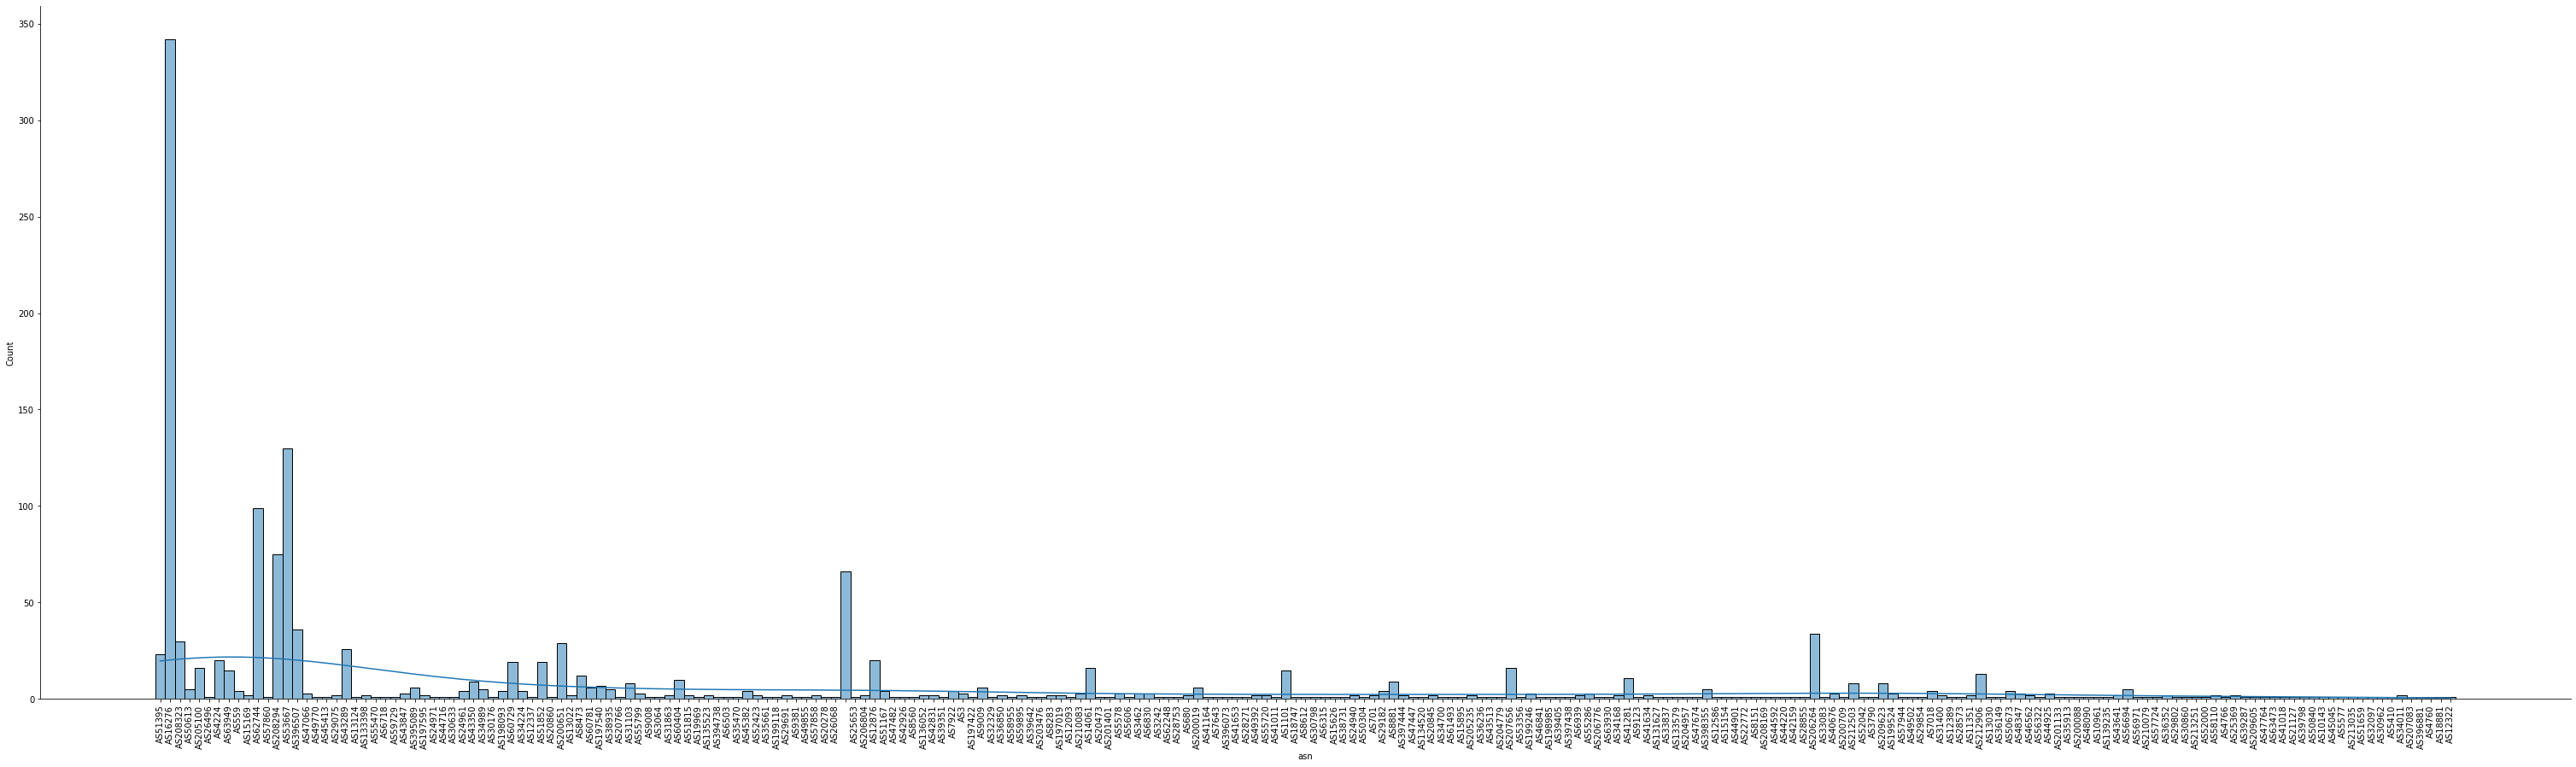

In [86]:
#Graphe ASN 
pli = sns.displot(data=df, x='asn', binwidth=1, kde=True, multiple="stack", height=12, aspect=3.5)
pli.set_xticklabels(rotation=90)

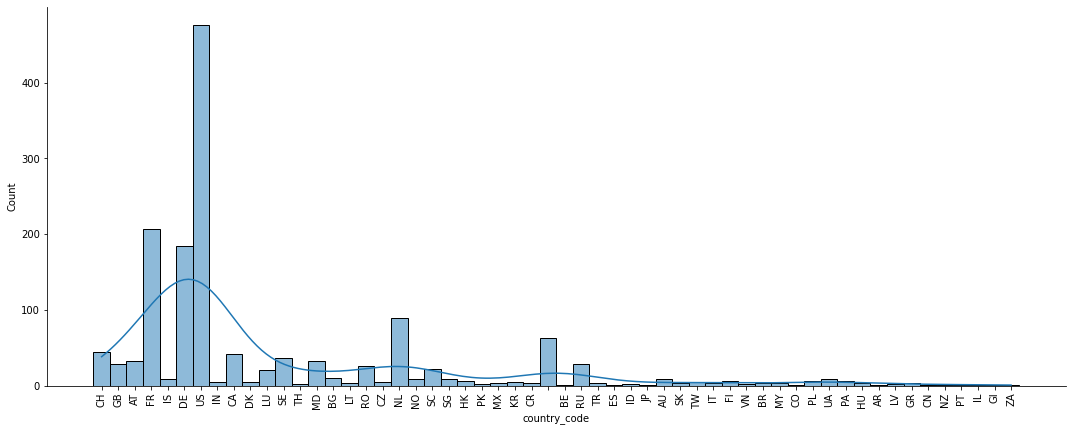

In [72]:
# Graphe country_code
pli = sns.displot(data=df, x='country_code', binwidth=1, kde=True, multiple="stack", height=6, aspect=2.5)
pli.set_xticklabels(rotation=90)

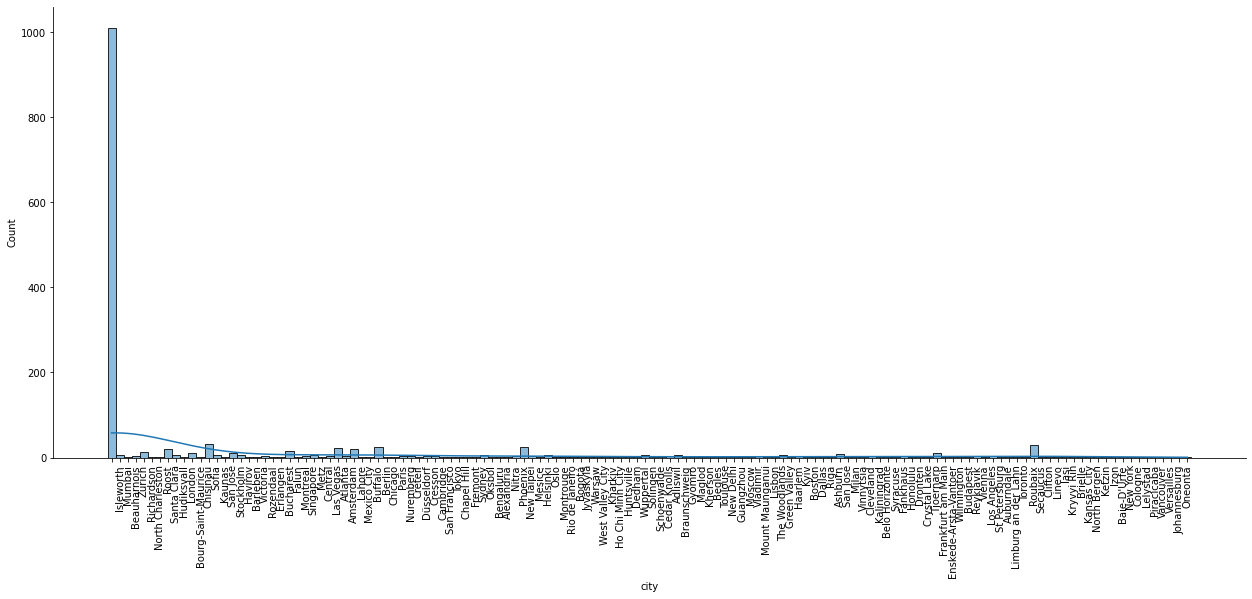

In [73]:
# Graphe city
pli = sns.displot(data=df, x='city', binwidth=1, kde=True, multiple="stack", height=7, aspect=2.5)
pli.set_xticklabels(rotation=90)

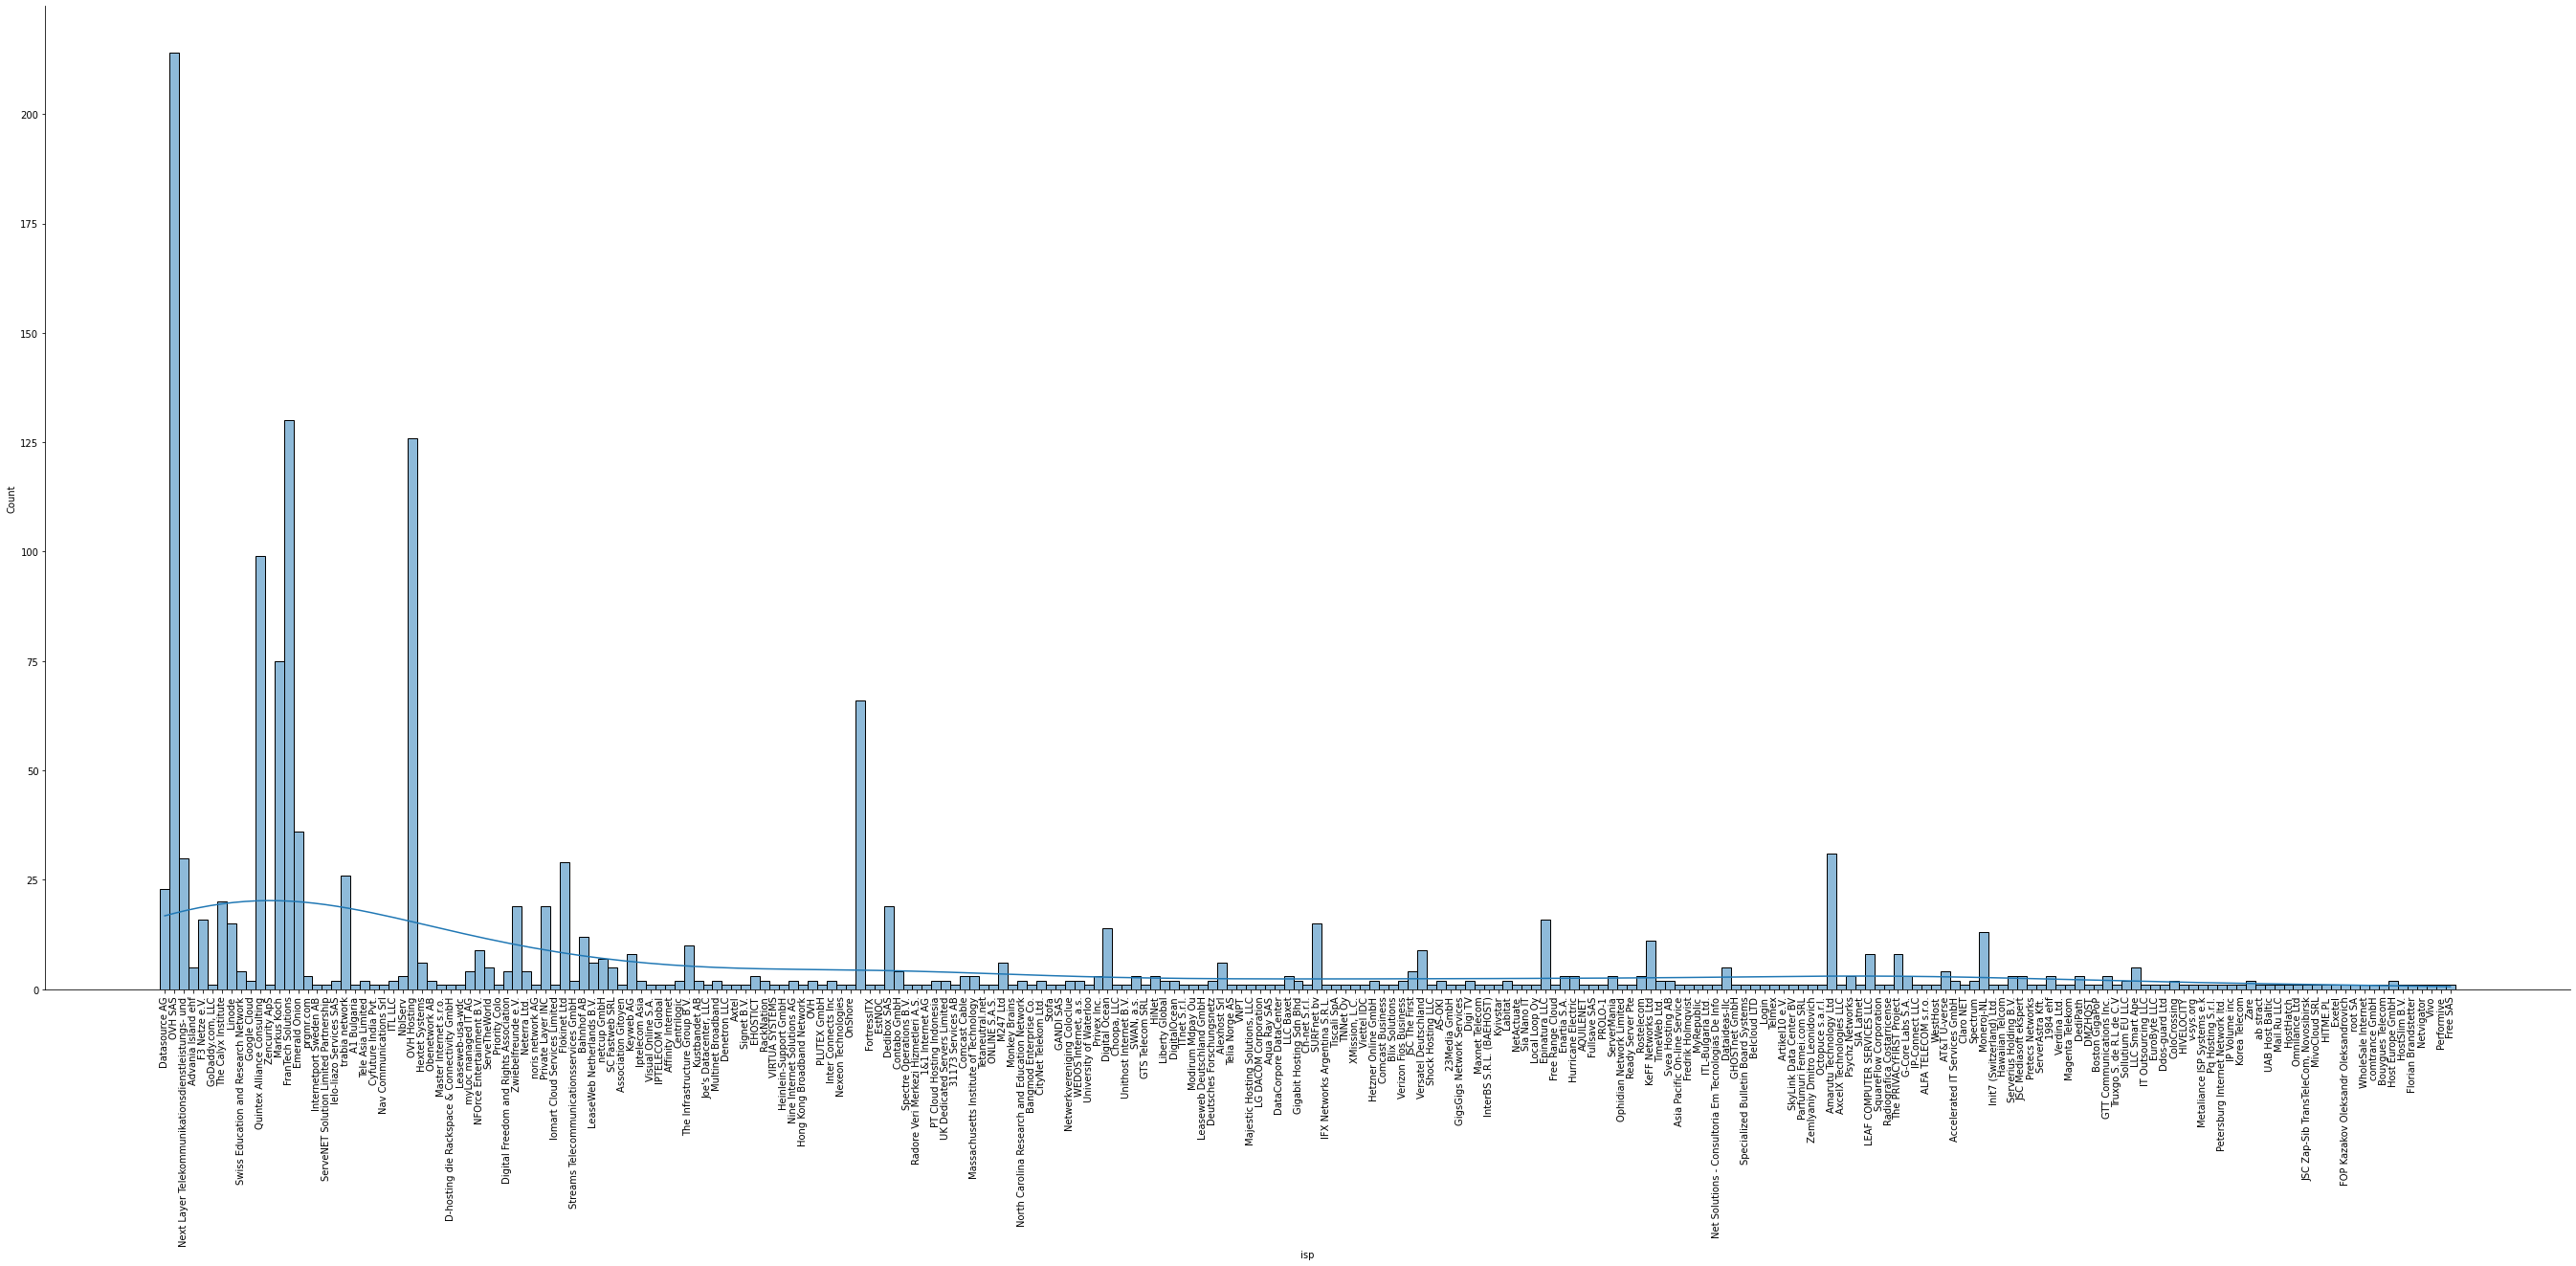

In [87]:
# Graphe ISP
pli = sns.displot(data=df, x='isp', binwidth=3, kde=True, multiple="stack", height=15, aspect=2.5)
pli.set_xticklabels(rotation=90)

In [75]:
# Mise en forme des ports pour les afficher 1 par 1
ports_tab = []            
            
for elt in ports_CENSYS:
    for chifr in elt:
        elt2 = str(chifr)
        if elt2.isnumeric():
            #print(chifr)
            ports_tab.append(chifr)

In [76]:
# Afficher les ports one by one
ports_tab

[80,
 443,
 22222,
 80,
 443,
 22,
 80,
 22,
 9030,
 80,
 80,
 22,
 9001,
 9101,
 53,
 222,
 9030,
 80,
 443,
 20202,
 1022,
 9030,
 80,
 443,
 2223,
 81,
 80,
 8080,
 443,
 80,
 22,
 9001,
 9101,
 80,
 22,
 9001,
 9101,
 80,
 22,
 80,
 443,
 22,
 80,
 443,
 22,
 80,
 2200,
 9030,
 80,
 443,
 22,
 80,
 10007,
 20002,
 20010,
 20020,
 40005,
 80,
 443,
 22,
 80,
 10007,
 20001,
 20002,
 20010,
 80,
 443,
 110,
 80,
 80,
 443,
 80,
 443,
 80,
 443,
 22,
 80,
 443,
 80,
 443,
 2525,
 80,
 22,
 9001,
 9101,
 80,
 161,
 443,
 80,
 80,
 443,
 20201,
 20202,
 80,
 443,
 80,
 443,
 22,
 80,
 443,
 80,
 443,
 22,
 80,
 443,
 20201,
 20202,
 80,
 8080,
 443,
 80,
 443,
 80,
 443,
 22,
 80,
 80,
 443,
 80,
 443,
 222,
 80,
 443,
 80,
 443,
 20202,
 22,
 80,
 443,
 80,
 80,
 443,
 22,
 80,
 22,
 80,
 443,
 9030,
 21,
 22,
 9030,
 80,
 443,
 80,
 443,
 2222,
 80,
 443,
 81,
 22,
 9030,
 80,
 22,
 9001,
 9101,
 80,
 10007,
 20001,
 20002,
 20020,
 40005,
 80,
 443,
 22,
 80,
 443,
 22,
 80,
 443,
 9

In [77]:
# Nombre total des ports
len(ports_tab)

708

In [78]:
# Création d'un dataframe pour les ports
df_ports = pd.DataFrame(ports_tab,columns=['ports'])
df_ports

ports
0       80
1      443
2    22222
3       80
4      443
..     ...
703    443
704     80
705    443
706     80
707    443

[708 rows x 1 columns]

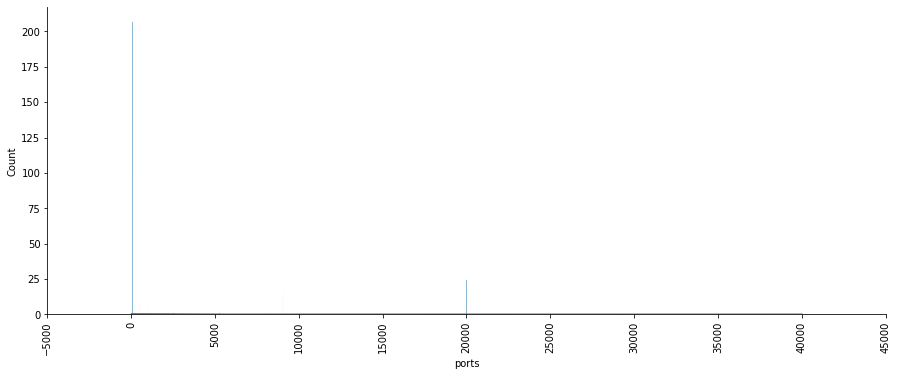

In [79]:
# Graphe Ports
pli = sns.displot(data=df_ports, x='ports', binwidth=3, kde=True, multiple="stack", height=5, aspect=2.5)
pli.set_xticklabels(rotation=90)

In [80]:
# Mise en forme des protocoles pour les afficher one by one
protocols_tab = []

for elt in tags_CENSYS:
    for chifr in elt:
        protocols_tab.append(chifr)

In [82]:
# Afficher les protocoles
protocols_tab

['http',
 'https',
 'http',
 'ssh',
 'https',
 'http',
 'ssh',
 'http',
 'http',
 'ssh',
 'dns',
 'http',
 'https',
 'http',
 'https',
 'http',
 'https',
 'http',
 'ssh',
 'http',
 'ssh',
 'http',
 'ssh',
 'http',
 'ssh',
 'https',
 'http',
 'ssh',
 'https',
 'http',
 'http',
 'ssh',
 'https',
 'http',
 'http',
 'ssh',
 'https',
 'http',
 'pop3',
 'http',
 'https',
 'http',
 'http',
 'https',
 'http',
 'https',
 'http',
 'ssh',
 'https',
 'http',
 'https',
 'http',
 'https',
 'http',
 'ssh',
 'http',
 'snmp',
 'https',
 'http',
 'http',
 'https',
 'http',
 'https',
 'http',
 'ssh',
 'https',
 'http',
 'https',
 'http',
 'https',
 'ssh',
 'http',
 'https',
 'http',
 'https',
 'http',
 'https',
 'http',
 'ssh',
 'https',
 'http',
 'http',
 'https',
 'http',
 'https',
 'http',
 'https',
 'http',
 'https',
 'ssh',
 'http',
 'https',
 'http',
 'http',
 'ssh',
 'https',
 'http',
 'ssh',
 'http',
 'https',
 'ftp',
 'ssh',
 'http',
 'https',
 'http',
 'https',
 'http',
 'https',
 'ssh',
 'http

In [83]:
# Nombre total des protocoles
len(protocols_tab)

485

In [84]:
# Création d'un dataframe pour les protocoles 
df_tags = pd.DataFrame(protocols_tab,columns=['Protocols_tag'])
df_tags

Protocols_tag
0            http
1           https
2            http
3             ssh
4           https
..            ...
480         https
481          http
482         https
483          http
484         https

[485 rows x 1 columns]

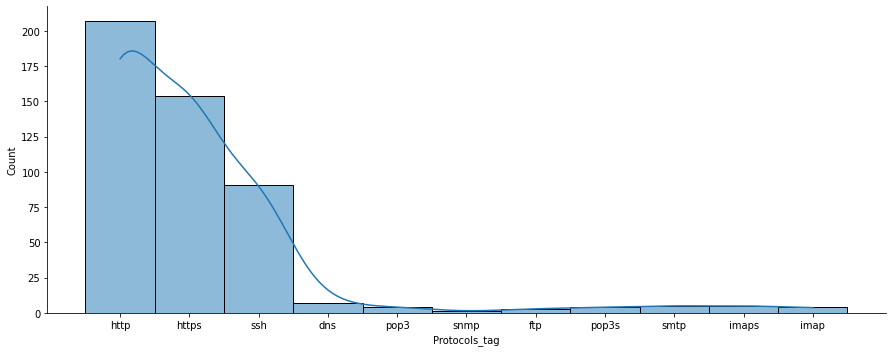

In [85]:
# Graphe protocoles
pli = sns.displot(data=df_tags, x='Protocols_tag', binwidth=3, kde=True, multiple="stack", height=5, aspect=2.5)
pli.set_xticklabels(rotation=0)

In [88]:
# Création d'un graphe Matplotlib
g = nx.Graph()

In [89]:
# Création des liens entre country_name,isp et IP
for index,row in df_samples_SHODAN.iterrows():
    country_name = row['country_name']
    isp = row['isp']
    ip = row['IP']
    g.add_edge(country_name,isp)
    g.add_edge(isp,ip)

In [90]:
# Afficher le graphe relationnel entre country_name,isp et IP
plt.figure(figsize=(100,100))
nx.draw(g, with_labels = True)

In [ ]:
# FIN du projet